# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:** Smartcab does not move during simulation, hence receives only "No action taken" reward. This reward is positive, when light is red or when light is green with oncoming traffic. The reward is negative, when light is green and no oncoming traffic.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

- *agent.py* There are multiple flags available for simulation configuration in *run()* method. Three of them are:
    - **learning** - this flag forces driver agent to use Q-learning when set to *True*, otherwise it is expected that, agent will make random actions.
    - **enforce_deadline** - this flag enables deadline countdown when set to *True*. The counter is decreased by 1 after every action and environment aborts the simulation when it is less then or equal to zero. Otherwise simulation continues until the agent reaches the destination.
    - **log_metrics** - when the flag is set to *True* the simulation writes log to corresponding file in */log* folder.
- *environment.py* The *act()* function is called when agent performs an action.
- *simulator.py* Both *render()* and *render_text()* are responsible for displaying simulation information, but *render_text()* writes it to terminal/command prompt and *render()* draws it on PyGame graphical interface.
- *planner.py* *next_waypoint()* function consider East-West direction first, only after that it checks if the destincation is North or South of location.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


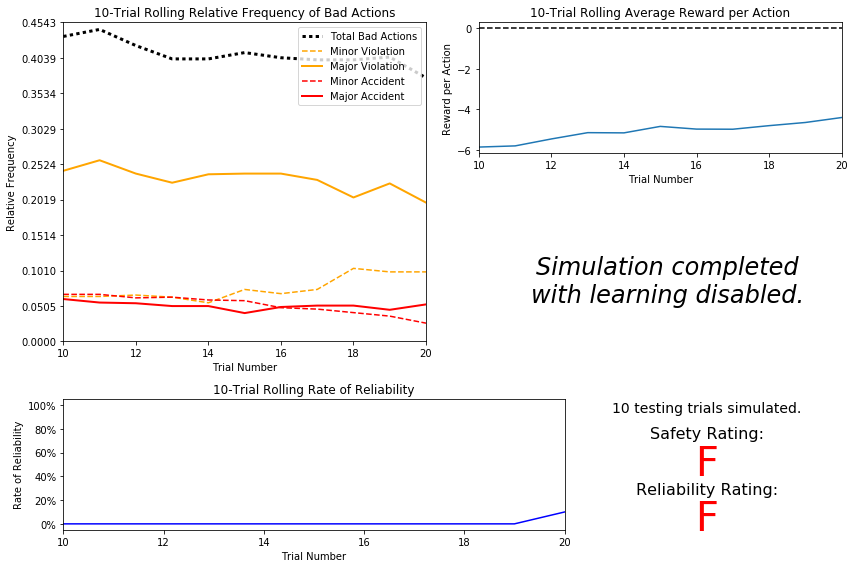

In [2]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

- The agent made bad decision approximately 40% of the time - it was $\approx{44\%}$ at the beginning and slowly fell down till $\approx{37\%}$. Such radnom behaviour caused major accidents $\approx{5\%}$ of the time.
- When picking actions at random agent met deadline 1 time out of 20 trials. This absolutely does not make sense, as the agent does not even tries to meet the deadline and not learning.
- The reward slowly grows from -6 up to almost -4. It seems like such increase in reward is related to decrease of major violations overtime - this is pretty consistent with reward system and suggests that agent has not been penalized heavily for its actions.
- As the number of trials increase the reliabilty rate stay 0% almost all of the time, with one exceptional success at the end. The number of accidents stayed $\approx{5\%}$ all of the time. The number of major violations decreased a little bit, but increased a number of minor violations. However, even this microimprovement is not a merit of the learning agent, but matter of chance.
- No, obviously this Smartcab cannot be considered safe and reliable for its passengers, as it causes too many acidents and doesn't not even try to reach the destination point.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:**

Important features:

- **light** is very important for both safety and efficiency. Otherwise, it may stay idle on green light without necessity - hence waste time and lose in reliability; or, which is worse, it may move on red light and cause an violation or accident - lose in safety.
- **waypoint** is very important in terms of efficiency and should be known to agent, so it can successfully reach the destination, not just walk blindly.
- **oncoming** is important in terms of safety. When the agent is going to turn left on green light, then it is necessary to know the intended direction of the car accross the intersection. It may lead to an accident if paths intersect.
- **left** is somewhat important for efficiency and safety. When agent is going to move right when the light is red, then it is necessary to know the intended direction of the car to the left - if it is "forward", then turn right will cause an accident, otherwise turn right is safe. Of cousre, safe right turn on red light gives some gain in reliability.

Features, that may be omitted:

- **deadline** may be useful for safety/efficiency tradeoff. For example, agent may consciously make violations to win some time. But the distance to the goal is unknown, so it is unclear if such hurry will give a real benefit. Adding deadline drastically increases the state space, but the gain is is doubtful, so I think that this feature may be ignored.
- **right**; in case of red light turn left and move forward is forbidden anyway and turn right safety is not affected by car from the right. In case of green light for agent, the color of traffic light for right car is red, so any possible accident is not a fault of an agent. To sum up, the intended direction of car from the right does not bring any useful information, if the color of the light is already known - feature may be omitted.


### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:** 

`Light = { red, green }` 

`Waypoint = { left, forward, right }`

`Oncoming = { left, forward, right, None }`

`Left = { left, forward, right, None }`

If `State = (light, waypoint, oncoming, left)`, then `|State| = |Light| * |Waypoint| * |Oncoming| * |Left| = 2 * 3 * 4 * 4 = 96` possible states. Considering that there are 4 possible actions: `Action = { left, right, forward, None }`, the size of state-action space for Q-learning is `|State| * |Action| = 96 * 4 = 384` items. I am pretty confident, that agent may learn a policy for each of this items within some finite reasonable number of training trials.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

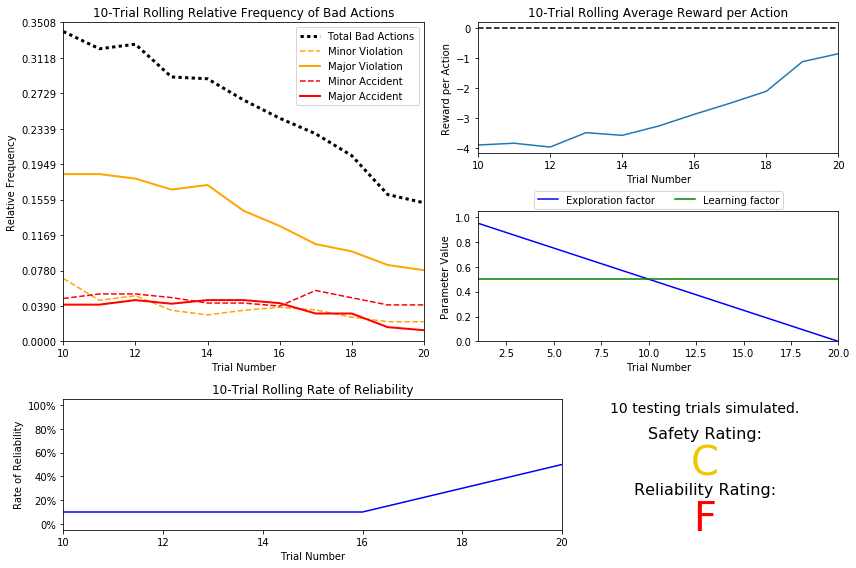

In [3]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

- No, the observations are not similar for basic agent and the default Q-Learning agent. The amount of violations and bad actions for Q-Learning agent is dramatically lower and seeks towards zero; and for basic agent this amount is permanently high. This seems pretty reasonable, considering the fact that experience is accumulated for Q-learning agent. Also, the reliability is much higher for Q-learning agent, that for basic agent.
- Driving agent did exactly 20 (whcih is minimum required number) training trials before testing. The final value of $\epsilon$ with such linear decay was $\epsilon = 1 - 20 \times 0.05 = 0$, which is less than default $\epsilon$-tolerance 0.05. So, no more training trials were required.
- Yes, the decaying function is represented on parameters panel as the straight line with correct intercept and slope exactly, as expected.
- As the number of training trials increased, the total amount of bad actions decrease and the average reward increase.
- The safety rating is still "F", but the relability rating become "C", which is obvious improvement. Even despite the safety rating remained the same, it is much better for Q-Learning agent, than for basic agent. 

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

**Simulation Commons**

All simulations below are configured in such way, that number of training trails is:

$N_{trials} = 200$

Tolearnce is selected such that simulations stops exactly after 200 training trials:

$tolerance = \epsilon_{N_{trials}} = \epsilon_{200}$

Learning rate is:

$\alpha = 0.05$

**Simulation #1 (old)**

$\epsilon_{t} = 1 - a t, \qquad a = 1 / N_{trials}, \qquad tolerance = 0$


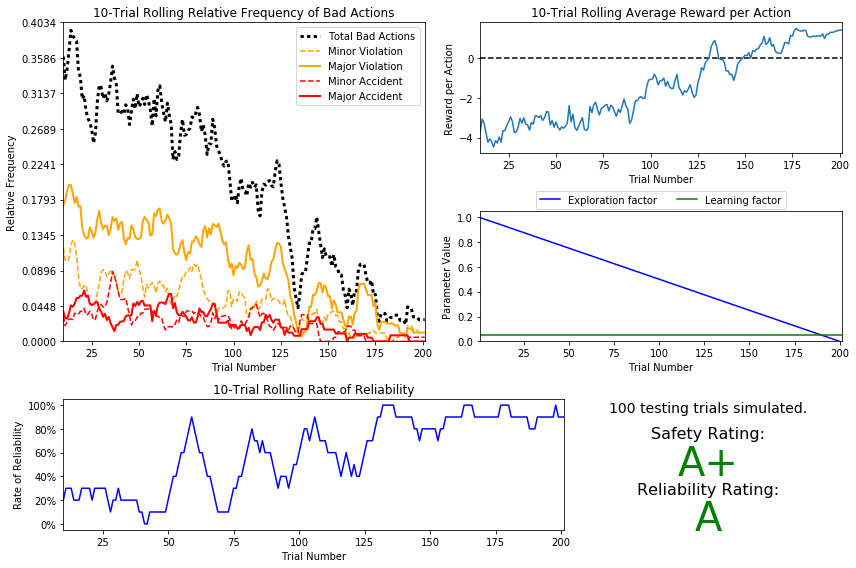

In [4]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning-1.csv')

**Simulation #1**
New, with updated reward for actions, oppoiste to waypoint

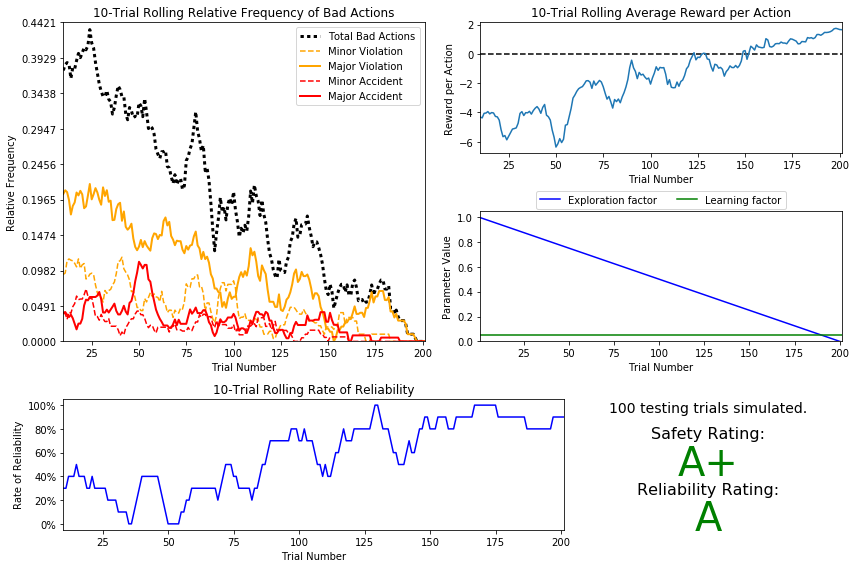

In [5]:
vs.plot_trials('sim_improved-learning-1-new.csv')

**Simulation #2**

$\epsilon_{t} = a^{t} \qquad a = 0.95, \qquad tolerance = a ^ {N_{trials}}$

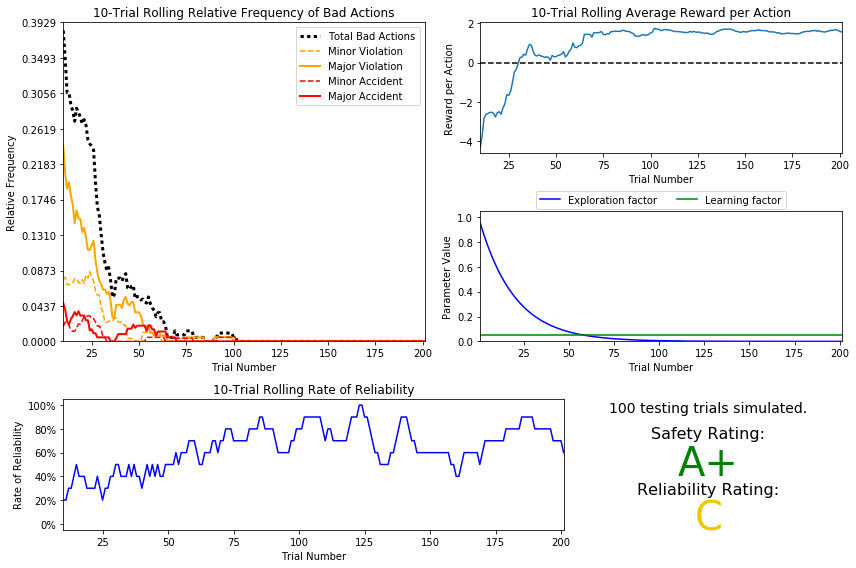

In [6]:
vs.plot_trials('sim_improved-learning-2.csv')

**Simulation #3**

$\epsilon_{t} = a^{t} \qquad a = 0.9, \qquad tolerance = a ^ {N_{trials}}$

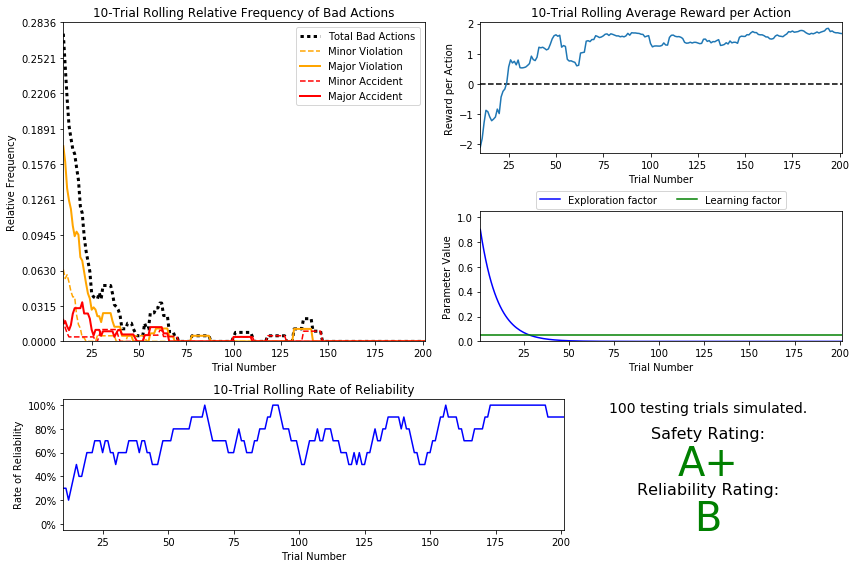

In [7]:
vs.plot_trials('sim_improved-learning-3.csv')

**Simulation #4**

$\epsilon_{t} = a^{t} \qquad a = 0.85, \qquad tolerance = a ^ {N_{trials}}$

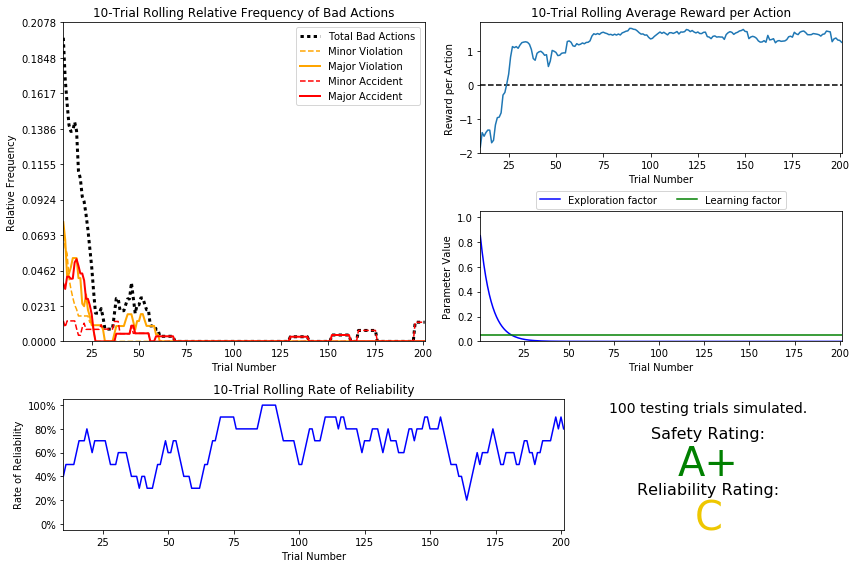

In [8]:
vs.plot_trials('sim_improved-learning-4.csv')

**Simulation #5**

$\epsilon_{t} = \cos(\frac{\pi}{2} a t), \qquad a = 1 / {N_{trials}}, \qquad tolerance = \cos{\frac{\pi}{2}}$

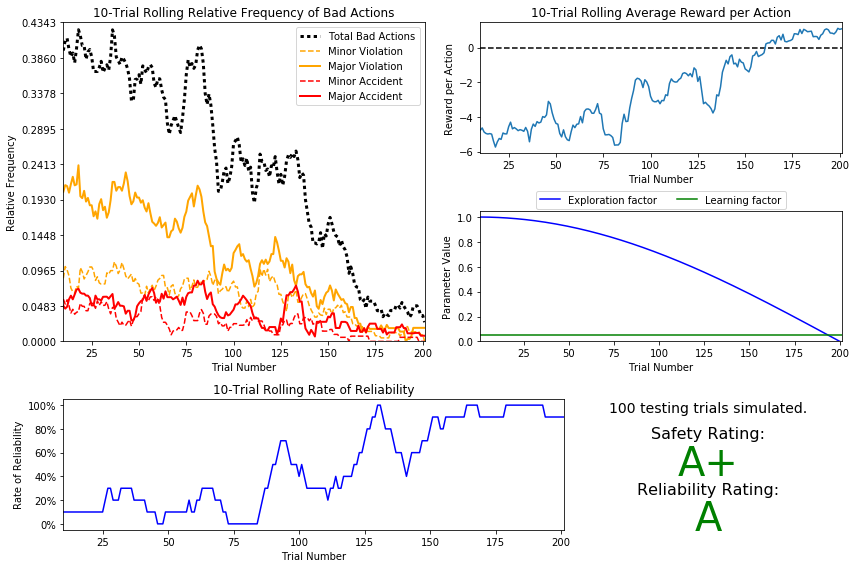

In [9]:
vs.plot_trials('sim_improved-learning-5.csv')

**Simulation #6**

$\epsilon_{t} = \frac{1}{t ^ 2}, \qquad tolerance = 1 / N_{trials}^2$

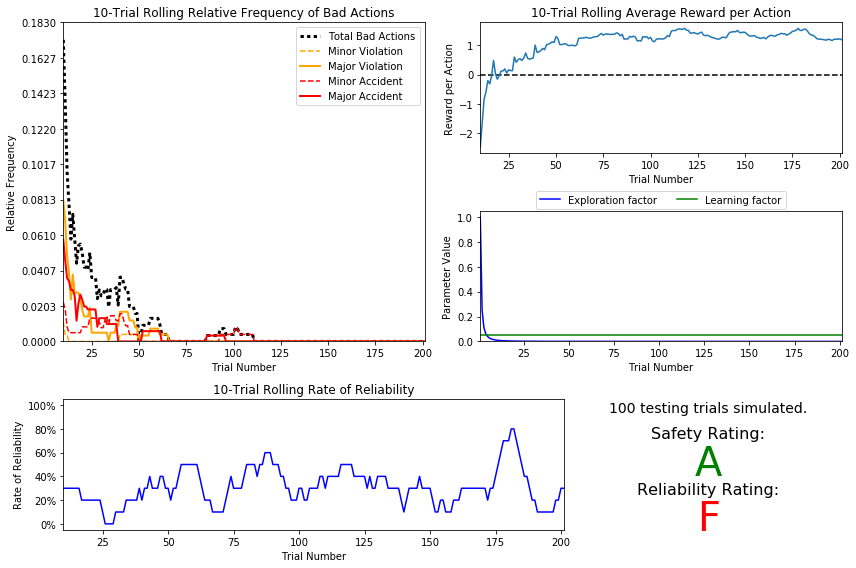

In [10]:
vs.plot_trials('sim_improved-learning-6.csv')

**Simulation #7**

$\epsilon_{t} = 1 - \tanh(a t), \qquad a = 0.01, \qquad tolerance = \tanh(a N_{trials})$

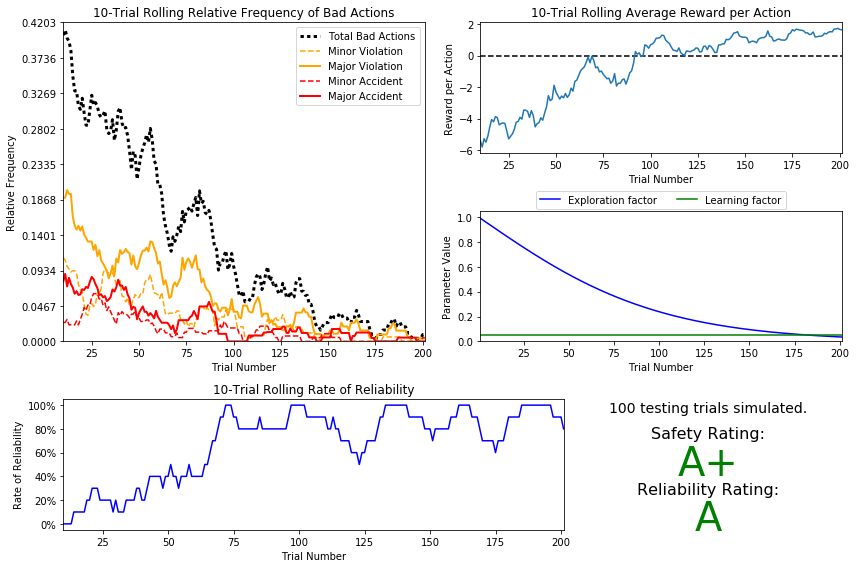

In [11]:
vs.plot_trials('sim_improved-learning-7.csv')

**Simulation #8**

$\epsilon_{t} = 1 - \tanh(a t), \qquad a = 0.025, \qquad tolerance = \tanh(a N_{trials})$

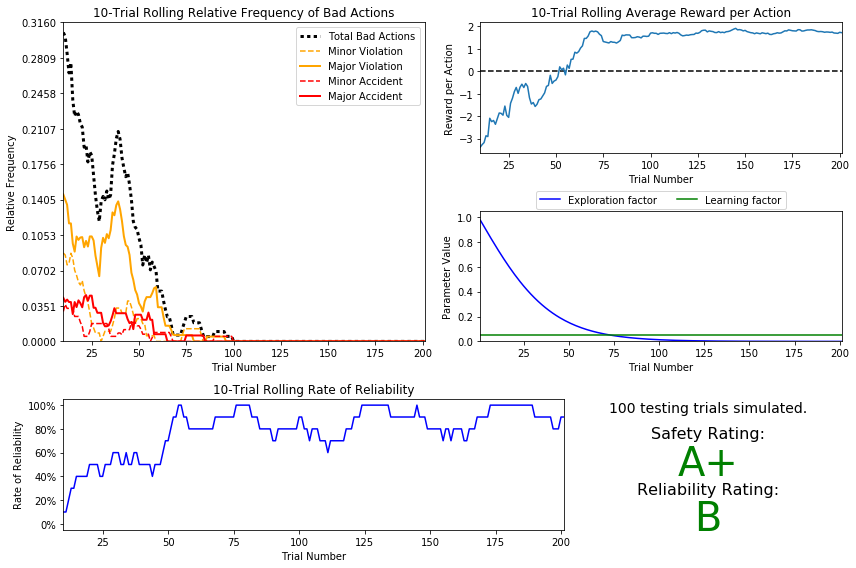

In [12]:
vs.plot_trials('sim_improved-learning-8.csv')

**Simulation #9**

$\epsilon_{t} = e ^ {- a t}, \qquad a = 0.01, \qquad tolerance = e ^ {- a N_{trials}}$

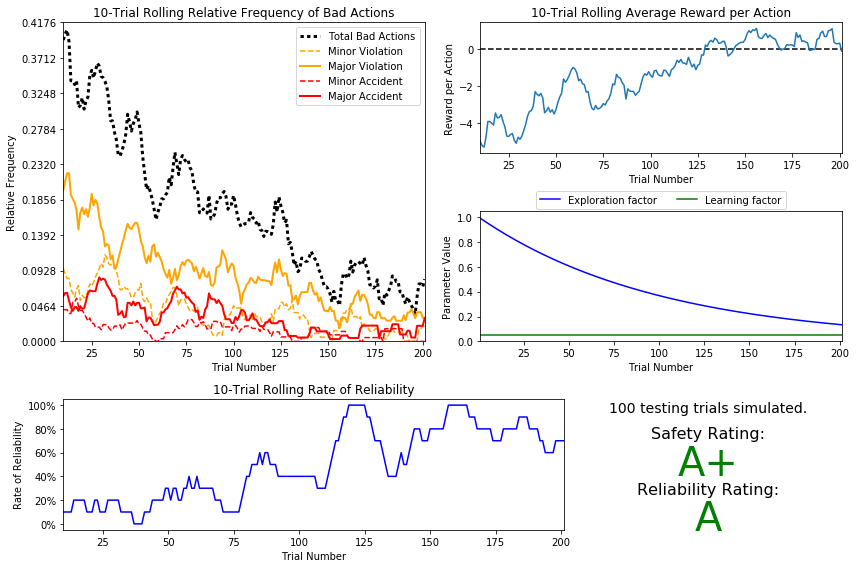

In [13]:
vs.plot_trials('sim_improved-learning-9.csv')

**Simulation #10**

$\epsilon_{t} = e ^ {- a t}, \qquad a = 0.025, \qquad tolerance = e ^ {- a N_{trials}}$

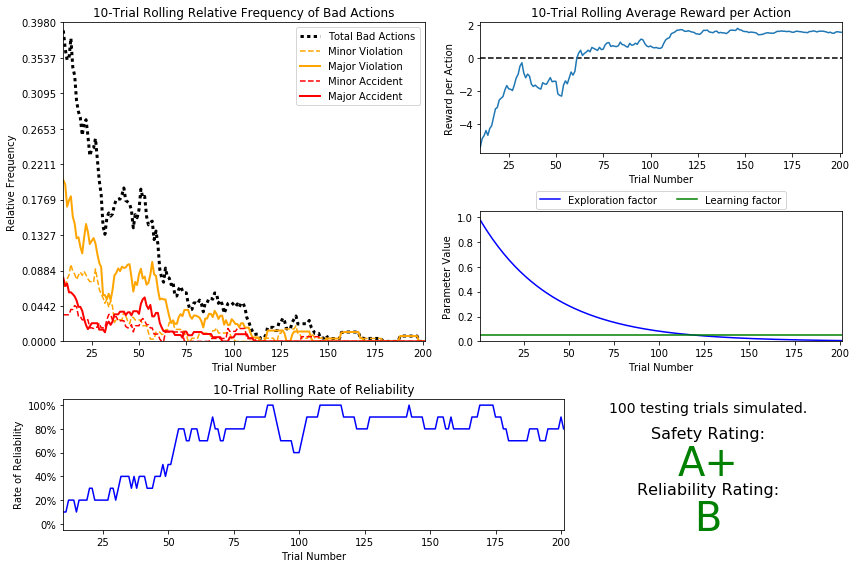

In [14]:
vs.plot_trials('sim_improved-learning-10.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

- Several decaying function was used for epsilon. Here is the short summary of them:

| $\epsilon$ decaying Function | $a$ parameter | Safety | Reliability |
|:----------------------------:|:-------------:|:------:|:-----------:|
| $1 - at$                     | $1 / N$       | A+     | A           |   
| $a^t$                        | 0.95          | A+     | C           |   
| $a^t$                        | 0.90          | A+     | B           |   
| $a^t$                        | 0.85          | A+     | C           |
| $\cos(\frac{\pi}{2} a t)$    | $1 / N$       | A+     | A           |
| $\frac{1}{t ^ 2}$            | -             | A+     | F           |
| $1 - \tanh(a t)$             | 0.01          | A+     | A           |
| $1 - \tanh(a t)$             | 0.025         | A+     | B           |
| $e ^ {- a t}$                | 0.01          | A+     | A           |
| $e ^ {- a t}$                | 0.025         | A+     | B           |

 So, in general, I may conclude that necessary result may be achieved with a wide range of continous, monotonically decreasing functions.
 
- All simulations were designed to have exactly $N_{trials} = N = 200$ training trials before beginning testing.
- As simulations were designed to have the same amount of training trials, tolerance was selected to be $tolerance = \epsilon_N = \epsilon_{200}$. The learning rate $\alpha = 0.05$ was selected for all simulations, as is completely sufficient and allows to achieve perfect score for many of decaying functions. Obviously, tuning the learning rate could improve score of some simulations, but it increases time for research, so it was left unchanged.
- Improved Q-Learner achieved maximum safety (A+) rating and almost perfect reliability (A) rating, comparing to the default Q-Learner, who achieved only "C" safety rating and "F" reliability. However, the imortant note here - default learning agend made only **20** training trials and agent with same linear $\epsilon$-decaying function from Simulation `#1` achieved A+/A after **200** training trials. This improved agent had much more time to learn the policy and had pretty similar rates of bad actions after 20 training trials, as default agent. So, the improvement is significant, but it required much more time.
- Yes, I can say, that 4 of 10 improved learning agents, who achieved A+/A rates, had learned the policy pretty well.
- I am comletely satisfied with the results of learning agent. I am not sure, that A+ relaiability may be achieved without red light violations for maximum time saving. The A+ safety is much more important, than A+ reliability and if it impossible to have them both I prefer A+/A (safety/reliability), than, for example A/A+.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:** The policy from `'sim_improved-learning-1.txt'` is explored. There is no too much sense to investigate the state-actions if at least one of values is `0.00`. As some nonzero reward is generated after every step, most likely `0.00` value means, that state was not visited "infinitely often" and agent have not even tried to make corresponding action in this state. So, of cource agent have not completely learned the policy for such kind of states and this analysis does not make sense.

Hence, first non-zero state selecetd (line 23):

`(waypoint = 'right', light = 'red', oncoming = 'right', left = None)
 -- forward : -0.50
 -- right : 0.90
 -- None : 0.26
 -- left : -3.89`
 
 The prohibited actions in this case are turn "left" and move "forward" - it would be a violation. The opposite car is intended to move right and if it has green light, the "left" move of agent would cause an accident. Nobody is going to follow the direction right to the agent, so "right" move is allowed and most optimal in this state. Idling ("None" action) is also acceptable, however it is not optimal in terms of reliability - agent just wastes the move. Exploring the assigned score for every action in output poicy, I may confidently say, that agent learned it pretty well.
 
The next without-zero state is (line 41):

`(waypoint = 'right', light = 'green', oncoming = None, left = 'left')
 -- forward : 0.46
 -- right : 0.15
 -- None : -1.06
 -- left : 0.08`
 
The light is green and nobody is going to interfer the agent's move, so obvious decision in this case is to follow the waypoint to the "right". The left move is dangerous (as it may cause an accident with left car, if it also has green light in some other universe, where this is possible) and, which is worse, is stupid, as it is the derection opposite to the destination point, so unacceptable in terms of reliability. Idling is minor violation, as the light is green. Move "forward" may be not so bad. The goal may be, for example, directly after the forward-right block, so it may be reached within 2 moves "right -> left" or "forward -> right". It is just a matter of how the waypoint is calculated. But it may happen, that the goal is directly around the right corner, so insted of just move "right", agent should do "forward -> right -> right", and lose in reliablity. So, the "forward" move is a game of chance and should be scored lower, that just move "right". 
 
However, the policy, learned by agent for this sate is seems a little bit strange and incorrect. Action "None" seems correctly evaluated, as it is direct loss in reliability. The random walk "forward" is scored higher, that "winning" move "right". The difference between the "winning" move and most stupid move "left" is not so significant, as desigred (only `0.15 - 0.08 = 0.07`). The strange thing, that "left" move scored positively. It means, that agent received positive reward from environment for moving opposite to the goal. It is strange and seems like a lack of environment. I have not found the code, which penalizes the agent for increasing the distance to the goal. The Manhattan distance is not a case here, as the direction of agent matters. If the agent direction is oppoiste to the goal it means at least 4 additional moves required - a big loss in reliability. So, I think, that incorrectly learned policy for "left" move is the guilt of environment, but not agent. 

_After update_

Modified reward for oposite waypoint selection (now it is negative) and modified exploration (in case of exploration, agent selects only from non-optimal action, not from all).
Policy from `'sim_improved-learning-1.txt'` - the same cases. Added counter for state-action selections during training.

`(waypoint = 'right', light = 'red', oncoming = 'right', left = None)
 -- forward : -2.92 (visits: 3)
 -- right : 0.15 (visits: 2)
 -- None : 0.72 (visits: 8)
 -- left : -7.49 (visits: 4)`
 
Even with pure exploration it seems like agent started to overexplore "None" action, which led to underexploring of optimal policy - "right" move. It's loss for reliability, but the final relaibility score is "A", so it seems like it is OK.

`(waypoint = 'right', light = 'green', oncoming = None, left = 'left')
 -- forward : 0.11 (visits: 4)
 -- right : 1.50 (visits: 29)
 -- None : -1.01 (visits: 4)
 -- left : -0.63 (visits: 5)`
 
Great improvement here now! Agent correctly learned the optimal policy - "right" move and actively used it. Сontroversial "forward" move has lower score now. Stpuid actions "left" and "None" now have negative score, which is great. So, seems like modification of reward gave the benefit!

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:** I think, that first characteristic, why the gamma cannot be used is that agent has too few knowledge of the environment. From agent's point of view the whole process looks like random state transitions - i. e. if agent makes some decision it may appear in almost any state (the exception is that "None" action does not change the waypoint). The agent does not know the distance to the goal, so it cannot build some kind of a sequence of states with decreasing value of distance to the goal. Agent does not build a "win plan", where it can prefer the next state to be closer to the goal, than current state. i. e. if $S_1$ - is the state, from which the goal, can be rached in one move, $S_2$ - in 2 moves, $S_n$ in `n` moves etc. then it make sense to build discounted sequence $S_n + \gamma S_{n-1} + \gamma ^ 2 {S_{n-2}} ... + \gamma ^ {n-1} S_1$, but not just blindly following the waypoint. But if the state transtion is random, this sequence does not make sense.

As for environment it is randomness. There are multiple dummy agents, who move stochastically inside a gridworld, so it is hard to generate a sequence of future rewrad for learning agent. For example, it is hard to build a kind of discounted "green light corridor" towards the goal, where agent may not waste a time, when standing at a red light.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.